In [1]:
# Import the necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score

In [2]:
# Load the Iris dataset from a CSV file into a DataFrame

IrisFlowers = pd.read_csv("D:\\Bharat Intern\\IRIS Details.csv")

In [3]:
# Display the first 10 rows of the dataset to get an initial view

IrisFlowers.head(10)

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [4]:
# Display the shape of the dataset (number of rows and columns)

IrisFlowers.shape

(150, 6)

In [5]:
# Generate summary statistics for the dataset to understand data distribution

IrisFlowers.describe()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Display information about the dataset, including data types and non-null counts

IrisFlowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Check for missing values in the dataset and display the count of null values

IrisFlowers.isnull().sum()

ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [8]:
# Remove the 'ID' column as it may not be relevant for analysis

IrisFlowers = IrisFlowers.drop('ID', axis = 1)

In [9]:
# Group the data by 'Species' and calculate the mean for each species to explore species-specific characteristics

IrisFlowers.groupby('Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [10]:
# Count the occurrences of each species in the dataset

speciesCount = IrisFlowers.Species.value_counts()
print(speciesCount)

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


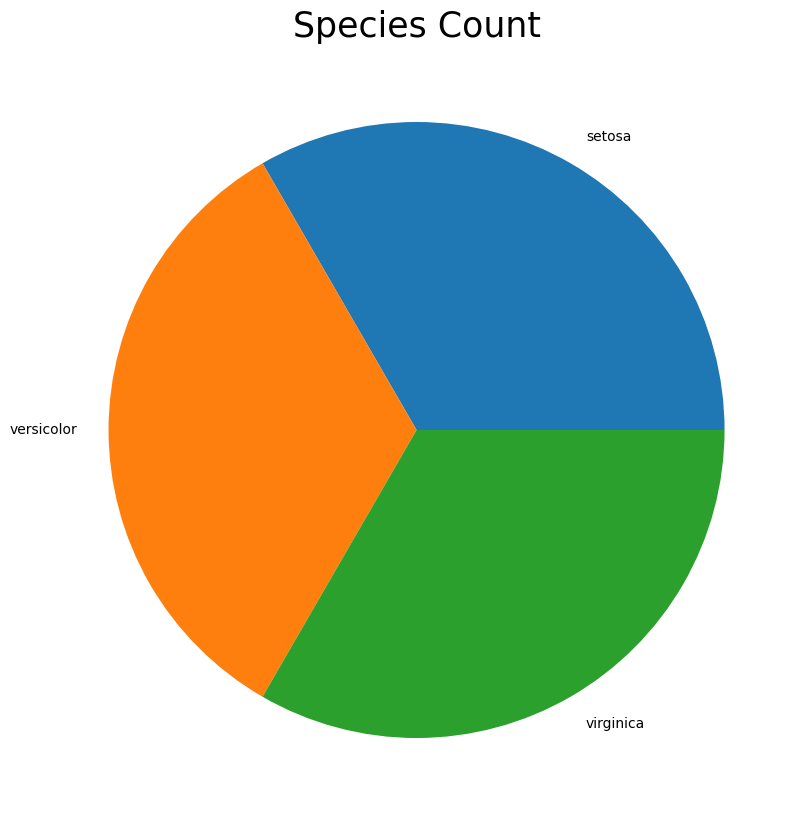

In [11]:
# Create a pie chart to visualize the distribution of species in the dataset

plt.figure(figsize = (10,10))
plt.pie(speciesCount, labels = IrisFlowers.Species.unique().tolist())
plt.title("Species Count", fontsize=25)
plt.show()

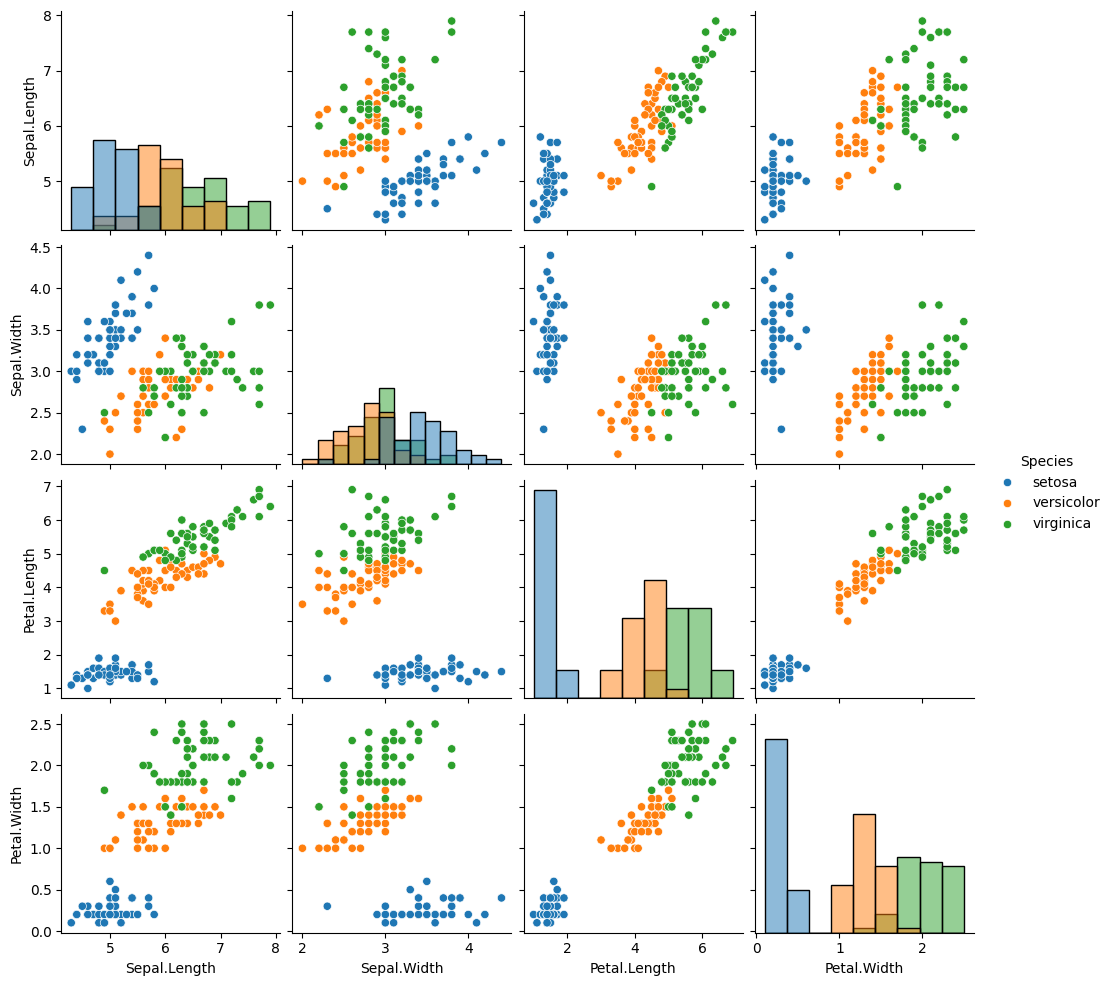

In [14]:
# Create a pairplot to visualize pairwise relationships and distributions in the dataset

sns.pairplot(IrisFlowers, hue="Species", diag_kind="hist")

In [15]:
# Map the 'Species' column to numerical values (0, 1, 2) for classification

IrisFlowers["Species"] = IrisFlowers["Species"].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

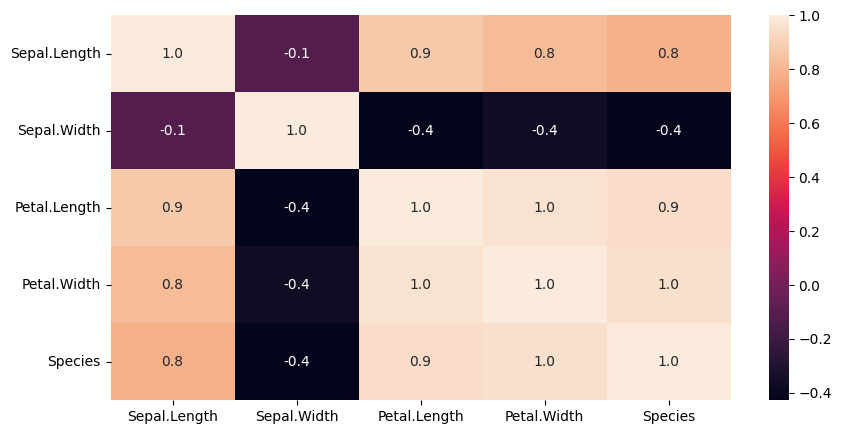

In [16]:
# Create a heatmap to visualize the correlation between features

plt.figure(figsize = (10,5))
sns.heatmap(IrisFlowers.corr(), annot=True, fmt='0.1f')
plt.show()

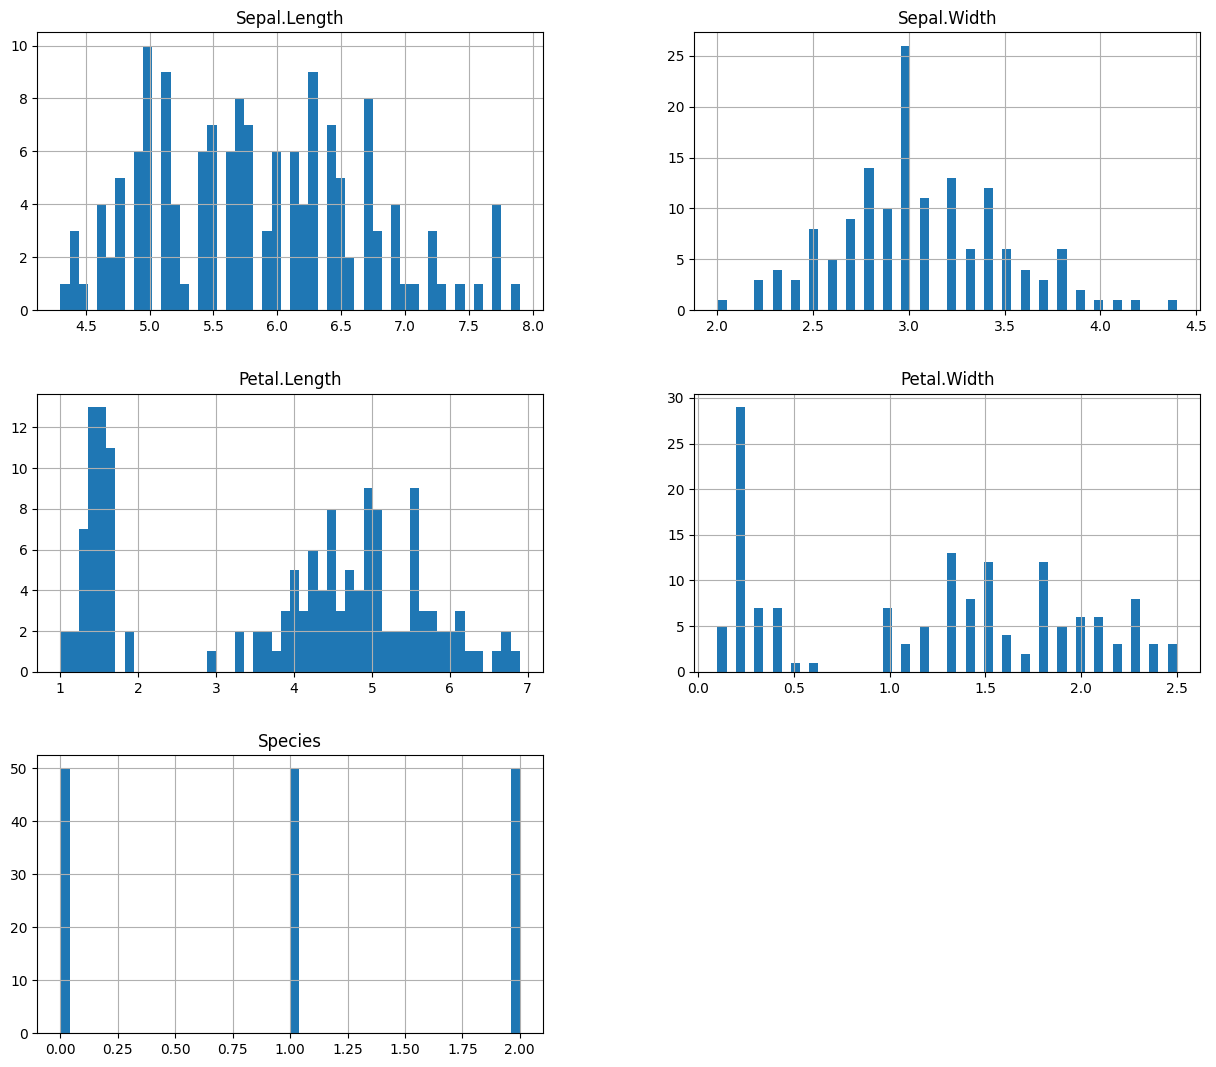

In [17]:
# Create histograms to visualize the distribution of each feature

IrisFlowers.hist(figsize=(15,13), bins = 50)
plt.show()

In [19]:
# Split the dataset into features (X) and target (y) for machine learning

x = IrisFlowers.drop('Species', axis = 1)
y = IrisFlowers['Species']

In [19]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [21]:
# Split the data into training and testing sets to assess model performance

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=5)

In [22]:
# Create a Logistic Regression model and fit it to the training data

logistic_model = LogisticRegression(max_iter = 1000)
logistic_model.fit(X_train, y_train)

logReg_prediction_y = logistic_model.predict(X_test)

In [23]:
# Calculate and display accuracy and R-squared (R^2) score of the model

logReg_accuracy = accuracy_score(y_test,logReg_prediction_y)
logReg_r2 = r2_score(y_test, logReg_prediction_y)

# Print model evaluation metrics

print(f'Accuracy: {logReg_accuracy * 100}')
print(f'R-square(R^2): {logReg_r2 * 100}')

Accuracy: 98.33333333333333
R-square(R^2): 97.43480119709278


In [24]:
# Generate a classification report with precision, recall, and F1-score

print(classification_report(y_test, logReg_prediction_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.97        19

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [25]:
# Display a confusion matrix to assess the classification performance

print(confusion_matrix(y_test, logReg_prediction_y))

[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]


In [26]:
# Create new data for prediction

new_data = pd.DataFrame({
    'Sepal.Length': 7.9,
    'Sepal.Width': 4.8,
    'Petal.Length': 6.2,
    'Petal.Width': 1.5,
     
},index=[0])

# Make predictions on the new data using the trained model

new_data_prediction = logistic_model.predict(new_data)

# Print the predicted species based on the model

if new_data_prediction[0]== 0:
    print("setosa")
elif new_data_prediction[0] == 1:
    print("versicolor")
else:
    print("virginica")

virginica
